In [ ]:
# Librerias 
import torch
import torchgeo
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchgeo.datasets import CDL, Sentinel2, Landsat7, Landsat8, Landsat9, stack_samples
from torchgeo.samplers import RandomGeoSampler


In [124]:
import os
import re

from glob import glob

# Abrir bandas
import rioxarray as rxr

# Concatenar bandas
import xarray as xr

# Leer shp file
import geopandas

# RGB
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


In [123]:
# %pip install Cython
%pip install rioxarray
%pip install earthpy
%pip install xarray
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
dataset = Landsat9(root = "./data/", bands = Landsat9.all_bands[1:-2])
print(dataset)

In [ ]:
# Ruta a los archivos de bandas
band_files = []
for file in os.listdir("./data/1_raw/landsat9_ags/"):
    if re.search(r"B[0-9]\.TIF$", file):
        band_files.append(os.path.join("data/1_raw/landsat9_ags/", file))
band_files


In [ ]:
band1 = rxr.open_rasterio("./data/1_raw/landsat9_ags/LC09_L2SP_028045_20211226_20220121_02_T1_SR_B1.TIF", masked = True).squeeze()
band1.shape

In [ ]:
# Plot

for band_file, band_number in zip(band_files, range(1, len(band_files) + 1)):
    band = rxr.open_rasterio(band_file, masked = True).squeeze()
    title = " ".join(["Landsat 9", "Band", str(band_number)])
    f, ax = plt.subplots()
    band.plot.imshow(ax = ax,
                    cmap = "Greys_r")
    
    ax.set_axis_off()
    ax.set_title(title)
    plt.show()

In [137]:
# Limpiar bandas y recortar

def open_clean_bands(band_file, cut = True):
    band_rxr = rxr.open_rasterio(band_file, masked = True).squeeze()
    if cut == True:
        shp = geopandas.read_file("./data/shp_ags/ags_municipio.shp")
        band_rxr.rio.clip(shp.geometry, )
    return band_rxr


NoDataInBounds: No data found in bounds.

<AxesSubplot: >

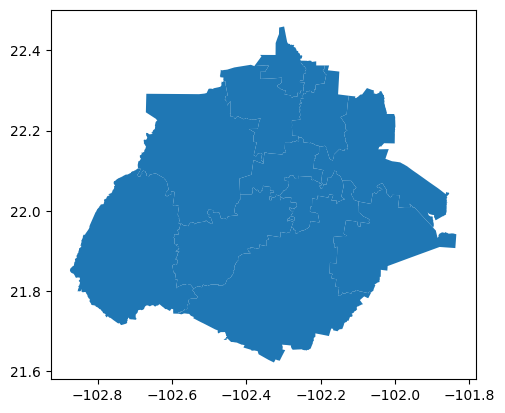

In [136]:
ags_shp = geopandas.read_file("./data/shp_ags/ags_municipio.shp")
ags_shp.plot()

In [139]:
# RGB plot

# Se agregan todas las bandas
all_bands = []
for i, band_file in enumerate(band_files):
    all_bands.append(open_clean_bands(band_file, cut = False))
    
    # Se asigna un numero de banda
    all_bands[i]["band"] = i + 1

landsat_xr = xr.concat(all_bands, dim = "band")
landsat_xr

<xarray.DataArray (band: 7, y: 7841, x: 7701)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7
  * x            (x) float64 1.212e+05 1.212e+05 ... 3.522e+05 3.522e+05
  * y            (y) float64 2.516e+06 2.516e+06 ... 2.281e+06 2.281e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

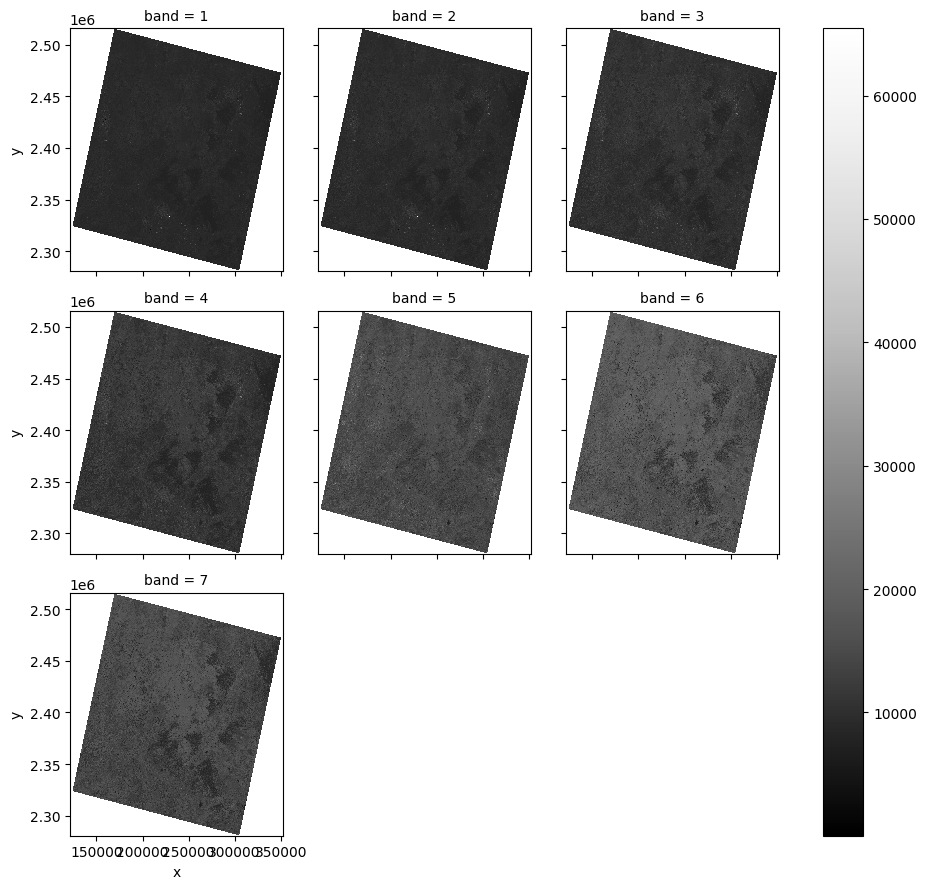

In [140]:
landsat_xr.plot.imshow(col="band",
                       col_wrap = 3,
                       cmap = "Greys_r")
plt.show()

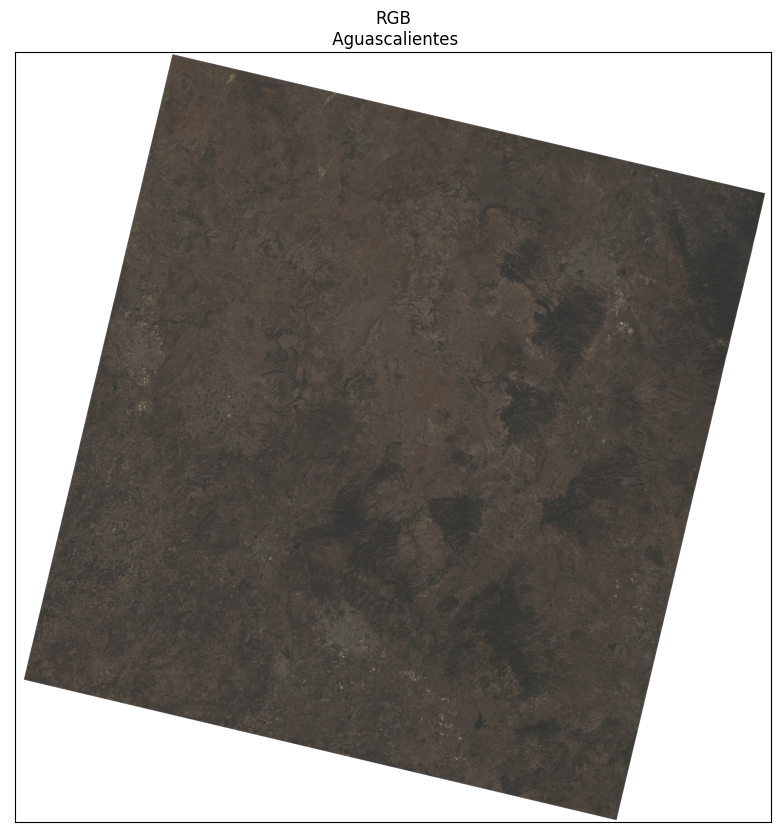

In [141]:
ep.plot_rgb(landsat_xr.values,
            rgb = [3, 2, 1],
            title="RGB\n Aguascalientes")
plt.show()